# OpenCV
**Prerequisite:** Before starting this exercise, you should make yourself familiar with Python and some necessary library, e.g., numpy, matplotlib, etc. One good tutorial can be found [here](http://cs231n.github.io/python-numpy-tutorial/).

In this exercise you will:
* Learn about some basic image processing operations with OpenCV.
* Re-implement some basic image processing operations. This will help you to
 * Have better understand about the image processing operations.
 * Practice Python programming with Numpy library.

In [1]:
import cv2
import numpy as np
import sys
import matplotlib
from matplotlib import pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
def rel_error(out, correct_out):
    return np.sum(abs(out.astype(np.float32) - correct_out.astype(np.float32)) / 
                          (abs(out.astype(np.float32)) + abs(correct_out.astype(np.float32))))

In [3]:
# Checking OpenCV version
cv2.__version__

'3.3.1'

### NOTICE: 
In this lab exercise, we recommend to use `OpenCV 3.x` version, the documentations for OpenCV API can be found [here](https://docs.opencv.org/3.0-beta/index.html).

## Load images
Use the function [cv2.imread()](https://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html?highlight=cv2.imread#cv2.imread) to read an image. The image should be in the working directory or a full path of image should be given. The function will return a numpy matrix.

Second argument is a flag which specifies the way image should be read.

 * cv2.IMREAD_COLOR - (1): Loads a color image. Any transparency (alpha channel) of image will be neglected. It is the **default flag**.
 * cv2.IMREAD_GRAYSCALE - (0): Loads image in grayscale mode
 * cv2.IMREAD_UNCHANGED - (-1): Loads image as such including alpha channel, if included.
 
**NOTE**: Color image loaded by OpenCV is in *Blue-Green-Red (BGR)* mode. But Matplotlib displays in *RGB* mode. So color images will not be displayed correctly in Matplotlib if image is read with OpenCV. We will discuss how to handle to display properly later.

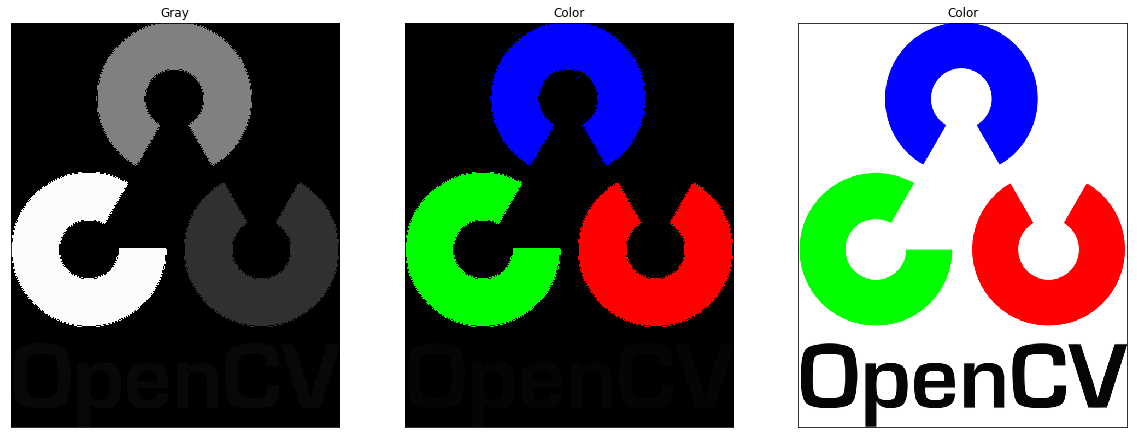

(742, 602)
(742, 602, 3)
(742, 602, 4)


In [13]:
img_gray = cv2.imread('imgs/opencv_logo.png', 0)

plt.figure(figsize=(20,10))
plt.subplot(131),
plt.imshow(img_gray, cmap='gray')  # include cmap='gray' to display gray image
plt.title('Gray'),plt.xticks([]), plt.yticks([])

img_color1= cv2.imread('imgs/opencv_logo.png', 1)
plt.subplot(132),plt.imshow(img_color1),
plt.title('Color'),plt.xticks([]), plt.yticks([])

img_color2= cv2.imread('imgs/opencv_logo.png',-1)
plt.subplot(133),plt.imshow(img_color2),
plt.title('Color'),plt.xticks([]), plt.yticks([])
plt.show()

print (img_gray.shape)
print (img_color1.shape)
print (img_color2.shape)


**Question:** How many channels for each image: img_gray, img_color1, img_color2?

**Your answer**: 
* img_gray: 1
* img_color1: 3
* img_color2: 4

# Transformations
## Scaling
Resize image using the function [cv2.resize](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.resize#cv2.resize).

In [6]:
# Get list of available flags
flags = [i for i in dir(cv2) if i.startswith('INTER_')]
print (flags)

['INTER_AREA', 'INTER_BITS', 'INTER_BITS2', 'INTER_CUBIC', 'INTER_LANCZOS4', 'INTER_LINEAR', 'INTER_MAX', 'INTER_NEAREST', 'INTER_TAB_SIZE', 'INTER_TAB_SIZE2']


In [17]:
img = cv2.imread('imgs/opencv_logo1.png', 1)
res = cv2.resize(img,None,fx=2.0, fy=2.0, interpolation = cv2.INTER_CUBIC)
#OR
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

################################################################################
# TO DO: Check the size of 'img' and 'res'?
################################################################################
print (('Img size = {}').format(img.shape[:2]))
print (('Res size = {}').format(res.shape[:2]))
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

################################################################################
# TO DO: Resize 'img' so as to the smaller side is 500, while keeping image 
# ration unchanged.
################################################################################
res = cv2.resize(img,None,fx=500.0/height,fy=500.0/height, interpolation = cv2.INTER_CUBIC)
print (('Res size = {}').format(res.shape[:2]))
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

Img size = (378, 428)
Res size = (756, 856)
Res size = (500, 566)


## Translation
Translation is the shifting of object's location. If you know the shift in $(x,y)$ direction, let it be $(t_x,t_y)$, you can create the transformation matrix $M$ as follows:

$$M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$$
You can take make it into a Numpy array of type **np.float32** and pass it into [cv2.warpAffine()](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.warpaffine#cv2.warpAffine) function.

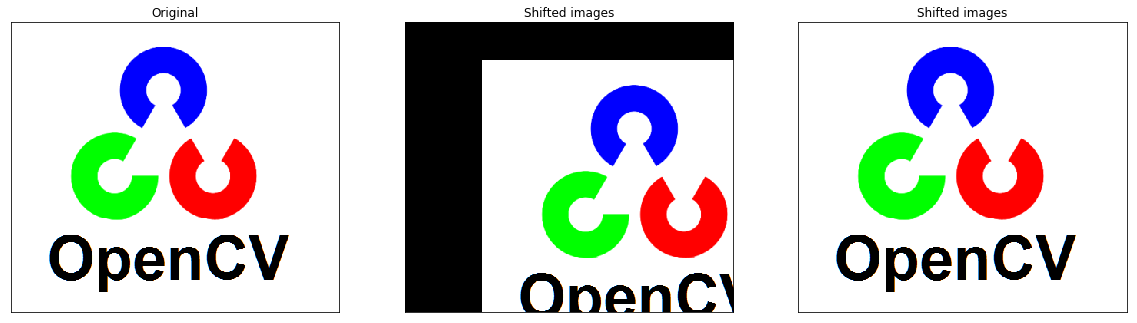

In [23]:
img = cv2.imread('imgs/opencv_logo1.png', 1)
rows,cols,_ = img.shape
M = np.float32([[1,0,100],[0,1,50]]) # Shift right by 100 and down by 50
dst = cv2.warpAffine(img,M,(cols,rows))

################################################################################
# TO DO: Observed that the bottom right of 'dst' image is lost. Modifying the
# following codeline so as to the 'res' image is fully shown.
################################################################################
M = np.float32([[1,0,0],[0,1,0]])
res = cv2.warpAffine(img,M,(cols,rows))
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img),
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst),
plt.title('Shifted images'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(res),
plt.title('Shifted images'),plt.xticks([]), plt.yticks([])
plt.show()

## Rotation
Calculates an affine matrix of 2D rotation using [cv2.getRotationMatrix2D()](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.getrotationmatrix2d#cv2.getRotationMatrix2D).
 * 1st argument: center
 * 2nd argument: angle (in degree)
 * 3rd argument: scale

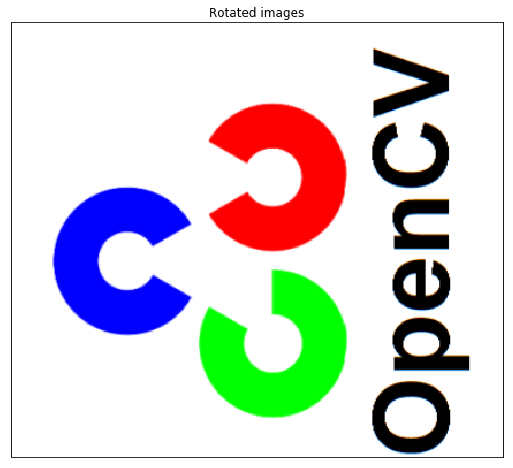

In [28]:
img = cv2.imread('imgs/opencv_logo1.png', 1)
H,W,_ = img.shape
################################################################################
# TO DO: Run the code to observe the output image.
# Modifying the code below so as to the 'dst' image has no black padding.
################################################################################
M = cv2.getRotationMatrix2D((W/2,H/2),90,1.13)
dst = cv2.warpAffine(img,M,(W,H))
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

plt.imshow(dst),
plt.title('Rotated images'),plt.xticks([]), plt.yticks([])
plt.show()

# Changing color space - Grayscale
Grayscale values is converted from RGB values by a weighted sum of the R, G, and B components:

$$0.2989 \times R + 0.5870 \times G + 0.1140 \times B $$

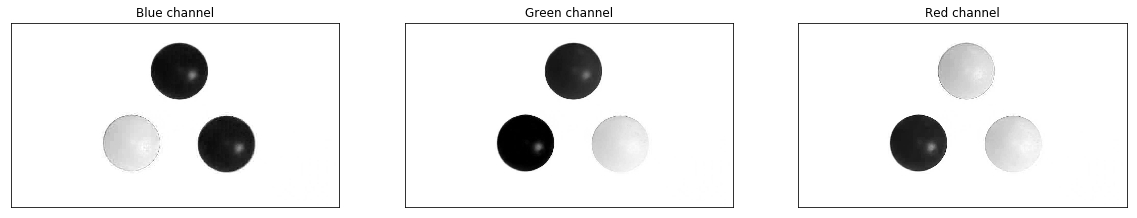

In [29]:
# Split channels
img = cv2.imread('imgs/balls.jpg', 1)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img[:,:,0], cmap='gray'),
plt.title('Blue channel'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img[:,:,1], cmap='gray'),
plt.title('Green channel'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img[:,:,2], cmap='gray'),
plt.title('Red channel'),plt.xticks([]), plt.yticks([])
plt.show()

In [54]:
def rgb2gray(img):
    """
    A implementation of the method that converts BGR image to grayscale image of 
    uint8 data type.
    """
    out = img[:,:,0]*0.2989+img[:,:,1]*0.5870+img[:,:,2]*0.1140 
    ################################################################################
    # TO DO: Implement the method to convert BGR image to Grayscale image.         #
    # Hint: Remember to round and convert the values to nearest uint8 values.      #
    ################################################################################
#     print (out)
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################
    
    return out

Run the following code section to compare your implementation of the `rgb2gray` function with OpenCV built-in function [cv2.cvtColor](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.cvtcolor#cv2.cvtColor).

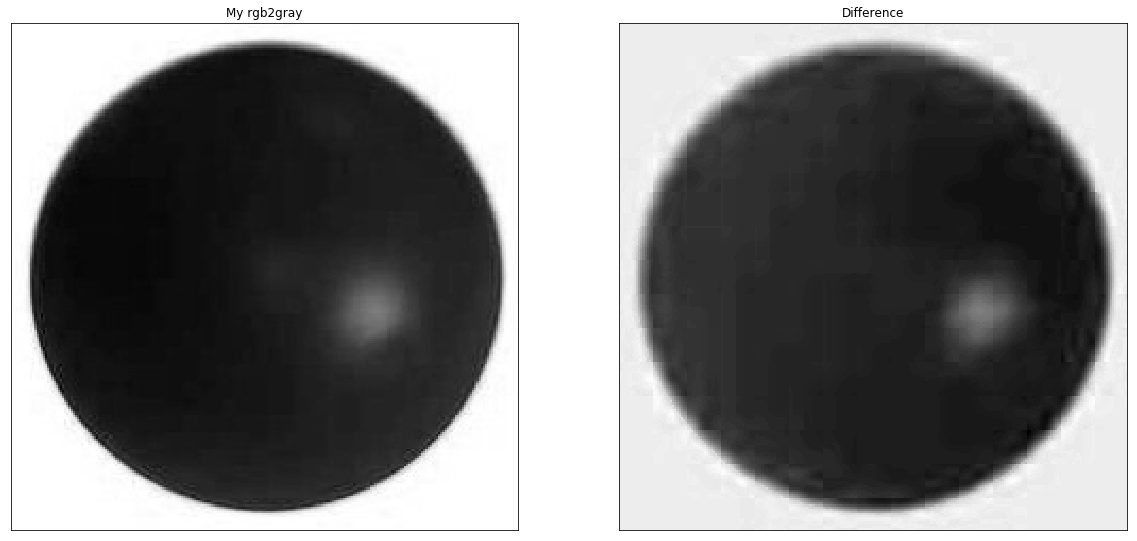

Testing rgb2gray
Number of difference pixel is 57121


In [55]:
img = cv2.imread('imgs/ball_red.jpg', 1)
img_gray1 = rgb2gray(img)
img_gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img_gray1, cmap='gray'),
plt.title('My rgb2gray'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_gray1 - img_gray2, cmap='gray'),
plt.title('Difference'),plt.xticks([]), plt.yticks([])
plt.show()

# Check your output: count 
print('Testing rgb2gray')
print('Number of difference pixel is %d' % np.count_nonzero(img_gray1 - img_gray2))

**Question:** Does your implementation of `rgb2gray` function give the result that is exactly the same as OpenCV built-in function? Why?

**Your answer:** fill in here

# Changing color space - Detect object by color. 
By converting BGR image to HSV, we can use this to extract a colored object. In HSV, it is more easier to represent a color than RGB color-space. In this exercise, we will try to extract blue, red, and yellow colored objects. So here is the method:

 * Take each frame of the video
 * Convert from BGR to HSV color-space 
 * We threshold the HSV image for a range of blue color
 * Now extract the blue object alone, we can do whatever on that image we want.

In [4]:
# Get list of available flags
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print (flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

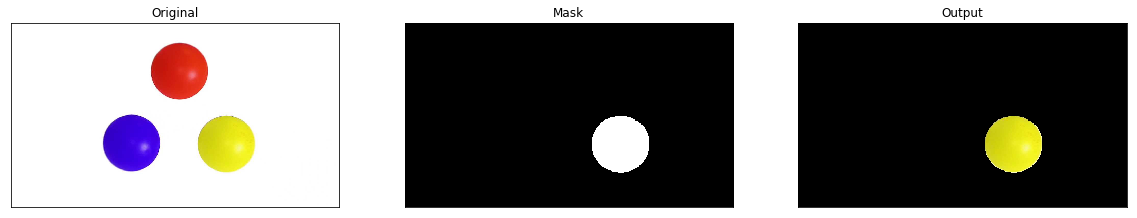

In [42]:
frame = cv2.imread('imgs/balls.jpg', 1)

# Convert BGR to RGB, now you will see the color of 'frame' image
# is displayed properly.
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Convert BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)

# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= mask)

################################################################################
# TO DO: Implement masks for red and yellow balls. 
################################################################################
lower_yellow = np.array([12,50,50])
upper_yellow = np.array([32,255,255])

lower_red = np.array([0,50,50])
upper_red = np.array([20,255,255])

mask_red = cv2.inRange(hsv, lower_red, uppwer_red)
mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

res_red = cv2.bitwise_and(frame, frame, mask=mask_red)
red_yellow = cv2.bitwise_and(frame, frame, mask=mask_yellow)

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(frame),
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(mask, cmap='gray'),
plt.title('Mask'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(res),
plt.title('Output'),plt.xticks([]), plt.yticks([])
plt.show()

# 2D Convolution ( Image Filtering )

OpenCV provides a function, [cv2.filter2D](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.filter2d#cv2.filter2D), to convolve a kernel with an image.
 
 

In [11]:
def convolution_naive(x, F, conv_param):
    """
    A naive implementation of a convolutional filter.
    
    The input consists of a gray scale image x (1 channel) with height H and width
    W. We convolve each input with filter F, which has height HH and width HH.
    
    Input:
    - x: Input data of shape (H, W)
    - F: Filter weights of shape (HH, WW)
    - conv_param: A dictionary with the following keys:
      - 'stride': The number of pixels between adjacent receptive fields in the
        horizontal and vertical directions.
      - 'pad': The number of pixels that will be used to zero-pad the input.
    
    Return:
    - out: Output data, of shape (H', W') where H' and W' are given by
      H' = 1 + (H + 2 * pad - HH) / stride
      W' = 1 + (W + 2 * pad - WW) / stride
    """
    
    stride = conv_param['stride']
    pad = conv_param['pad']
    H, W = x.shape
    HH, WW = F.shape
    H_prime = int(1 + (H + 2 * pad - HH) / stride)
    W_prime = int(1 + (W + 2 * pad - WW) / stride)
    x_pad = np.lib.pad(x, ((pad, pad), (pad, pad)),\
                            'constant', constant_values=(0))
    out = np.zeros((H_prime, W_prime), dtype=x.dtype)
    print(x_pad.shape)
    #############################################################################
    # TODO: Implement the convolutional forward pass.                           #
    # Hint: Using 2 nested for-loop to calculate each pixel of the output image.#
    #############################################################################
    for row in range (out.shape[0]):
        for col in range (out.shape[1]):
            inputFrame = x_pad[row:row+HH,col:col+WW]
            sum = 0.0
            for kernelRow in range (HH):
                for kernelCol in range (WW):
                    sum = sum + inputFrame[kernelRow][kernelCol]*F[kernelRow][kernelCol]
            out[row,col] = sum
            
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return out

Run the following code section to test your implementation of the `convolution_naive` function

In [22]:
x_shape = (5, 5)
F_shape = (3, 3)
x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
F = np.linspace(-0.2, 0.3, num=np.prod(F_shape)).reshape(F_shape)
conv_param = {'stride': 1, 'pad': 1}

out = convolution_naive(x, F, conv_param)
correct_out = np.array( [[ 0.0075,     0.030625,   0.0521875,  0.07375,    0.0475   ],
                         [ 0.114375,   0.1725,     0.18375,    0.195,      0.10875  ],
                         [ 0.1753125,  0.22875,    0.24,       0.25125,    0.1228125],
                         [ 0.23625,    0.285,      0.29625,    0.3075,     0.136875 ],
                         [ 0.0075,    -0.05375,   -0.0603125, -0.066875,  -0.1025   ]])
# print(correct_out.shape)
# print(out)

# Compare your output to ours; difference should be very small
print('Testing convolution_naive')
print('difference: ', rel_error(out, correct_out))

(7, 7)
Testing convolution_naive
difference:  0.0


In [15]:
# List of available BORDER effect
flags = [i for i in dir(cv2) if i.startswith('BORDER_')]
print(flags)

['BORDER_CONSTANT', 'BORDER_DEFAULT', 'BORDER_ISOLATED', 'BORDER_REFLECT', 'BORDER_REFLECT101', 'BORDER_REFLECT_101', 'BORDER_REPLICATE', 'BORDER_TRANSPARENT', 'BORDER_WRAP']


## Averaging filter
This is done by convolving image with a normalized box filter. A $5\times 5$ normalized box filter would look like below:
$$K = \frac{1}{25} \begin{bmatrix} 1&1&1&1&1 \\ 1&1&1&1&1 \\ 1&1&1&1&1 \\ 1&1&1&1&1 \\1&1&1&1&1 \end{bmatrix}$$

[[ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]]
Testing convolution_naive
difference:  0.00407813


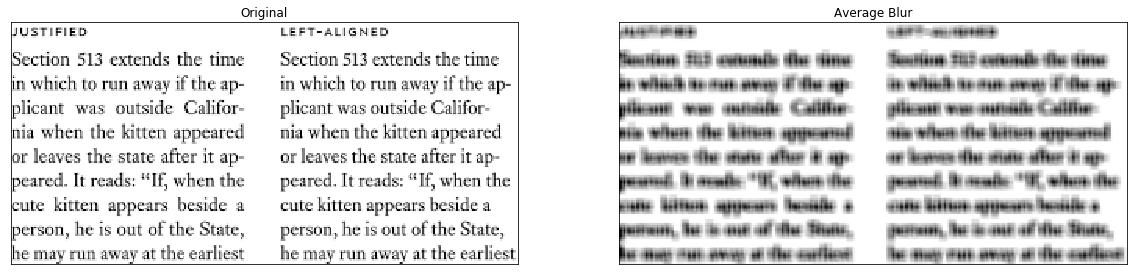

In [25]:
# Convert image data type from uint8 to float32.
img = cv2.imread('imgs/text.png', 1).astype(np.float32)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.zeros((5,5), np.float32)
################################################################################
# TODO: Create a 5x5 kernel as K shown above.                                  #
################################################################################
kernel = kernel + 1.0 / 25.0
print(kernel)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
blur_2dfilter = cv2.filter2D(img,-1,kernel)

# The above codes can be replaced by the following code line.
blur = cv2.blur(img,(5,5))

# Check your output; difference should be around 2e-8
print('Testing convolution_naive')
print('difference: ', rel_error(blur_2dfilter, blur))


# Visualize the output image
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img, cmap='gray'),
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),
plt.title('Average Blur'),plt.xticks([]), plt.yticks([])
plt.show()

## Gaussian Blurring
Here is the 1D Gaussian distribution:
$$G(x)=\frac{1}{\sigma\sqrt{2\pi} }\exp{\left(-\frac{x^2}{\sigma^2}\right)}$$

![1D Gaussian](imgs/Smoothing_Tutorial_theory_gaussian_0.jpg "1D Gaussian")

Similarly, we have 2D Gaussian distribution.
$$G(x,y)=\frac{1}{2\pi \sigma^2}\exp{\left(-\frac{x^2+y^2}{\sigma^2}\right)}$$
The nearest neighboring pixels have the most influence.
![2D Gaussian](imgs/gaussian_2d.gif "2D Gaussian")

[[ 0.00296902  0.01330621  0.02193823  0.01330621  0.00296902]
 [ 0.01330621  0.05963429  0.09832033  0.05963429  0.01330621]
 [ 0.02193823  0.09832033  0.16210282  0.09832033  0.02193823]
 [ 0.01330621  0.05963429  0.09832033  0.05963429  0.01330621]
 [ 0.00296902  0.01330621  0.02193823  0.01330621  0.00296902]]
Testing convolution_naive
difference:  0.00330511


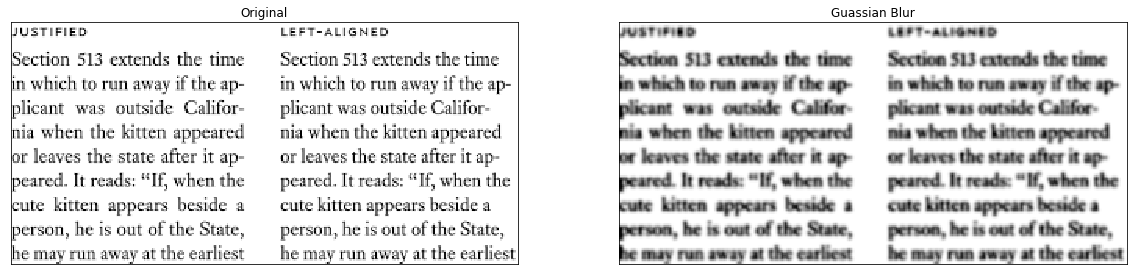

In [27]:
img = cv2.imread('imgs/text.png', 1).astype(np.float32)/255.0
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gaussian_kernel_XY = np.zeros((5,5), np.float32)
################################################################################
# TODO: Create a 5x5 kernel, 'gaussian_kernel_XY', which approximates the 
# Gaussian function with sigma=1. 
# Hint: + You should NOT munually create the kernel.  
#       + Use the 'cv2.getGaussianKernel' function to create 1D Guassian kernel.
#       + Use the associative property of convolution to create 2D Gaussian. A
# useful reference: https://blogs.mathworks.com/steve/2006/10/04/separable-convolution/
################################################################################
gaussianKernelX = cv2.getGaussianKernel(5, 1)
for i in range (len(gaussianKernelX)):
    for j in range (len(gaussianKernelX)):
        gaussian_kernel_XY[i][j] = gaussianKernelX[i] * gaussianKernelX[j]
print (gaussian_kernel_XY)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
blur_2dfilter = cv2.filter2D(img,-1,gaussian_kernel_XY)

# The above codes can be replaced by the following code line.
blur = cv2.GaussianBlur(img,(5,5),1)

# Check your output; difference should be around 4e-3
print('Testing convolution_naive')
print('difference: ', rel_error(blur_2dfilter, blur))

# Visualize the output image
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img, cmap='gray'),
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),
plt.title('Guassian Blur'),plt.xticks([]), plt.yticks([])
plt.show()

**QUESTION:** Provide your comments on the outputs of *a average filter* and *a Gaussian filter*? Which one is more preferable?

**Your answer:** The Gaussian filter gives a radiant feel to it, hence is preferable. This looks more realistic. 

## Median Filter

Example: 
 * **Odd** number of elements: $X=[2, 5, 1, 0, 9]\to X_{sorted}=[0,1,2,5,9]\Rightarrow \text{median}=2$
 * **Even** number of elements: 
    * Option 1: $X=[5, 1, 0, 9]\to X_{sorted}=[0,1,5,9]\Rightarrow \text{median}=1$
    * Option 2: $X=[5, 1, 0, 9]\to X_{sorted}=[0,1,5,9]\Rightarrow \text{median}=(1+5)/2=3$

In [89]:
# Implement a function to find median value with `option 1`.
def findMedian(x):
    out = 0
    #############################################################################
    # TODO: Implement the function to find median value of array x.             #
    # NOTE: You should see that the `median' numpy built-in function is based   #
    # on option 2.
    #############################################################################
    matrix = np.array(x)
#     flatArray = []
#     flattenArray(x, flatArray)
#     print(flatArray)
    flatArray = matrix.flatten()
    sortedArray = sorted(flatArray)
    numberOfElements = len(sortedArray)
    if numberOfElements % 2 == 0:
        out = .5 * (sortedArray[int(numberOfElements/2) - 1] + sortedArray[int(numberOfElements/2)])
    else:
        out = sortedArray[int(numberOfElements/2)]
        
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return float(out)
def flattenArray(x, flatArray):
    if not isinstance(x[0], (list,np.array)):
        for i in x:
            flatArray.append(i)
    else:
        for i in x:
            flattenArray(i, flatArray)
    return

In [90]:
print('Numpy median: ', np.median([[5,1],[0,9]]))
print('Numpy median: ', np.median([2,5,1,0,9]))
print('findMedian: ', findMedian([[5,1],[0,9]]))
print('findMedian: ', findMedian([2,5,1,0,9]))
# print('findMedian: ', findMedian([[[2,3],[3,4]],[[4,0,56],[3,4,1]]]))

Numpy median:  3.0
Numpy median:  2.0
findMedian:  3.0
findMedian:  2.0


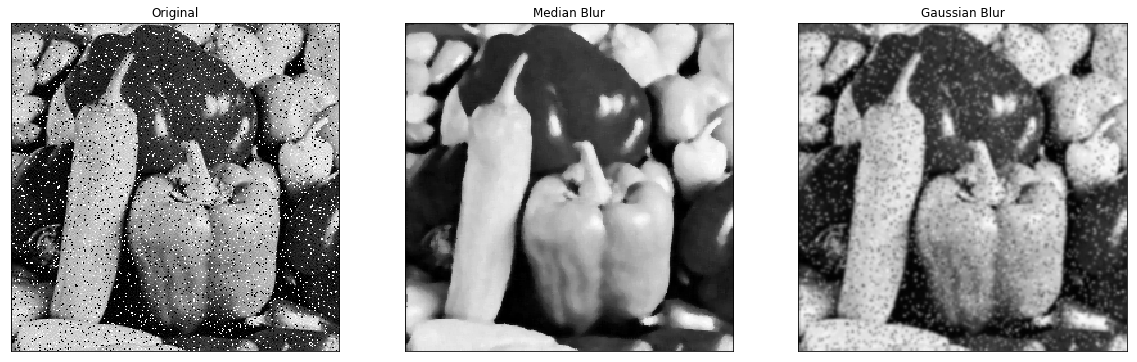

In [91]:
img = cv2.imread('imgs/SaltAndPepperNoise.jpg', 0)
median = cv2.medianBlur(img,5)
gau_blur = cv2.GaussianBlur(img,(5,5),1)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, 'gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(median, 'gray')
plt.title('Median Blur'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(gau_blur, 'gray')
plt.title('Gaussian Blur'),plt.xticks([]),plt.yticks([])
plt.show()

**QUESTION:** Provide your comments on the effectiveness of *a median filter* and *a Gaussian filter* for the example above? Explain why? 

**Your answer:** Median filter is more effective as it eliminates the noise while maintaining a rather good image quality.

/Users/nguyentrunghuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars


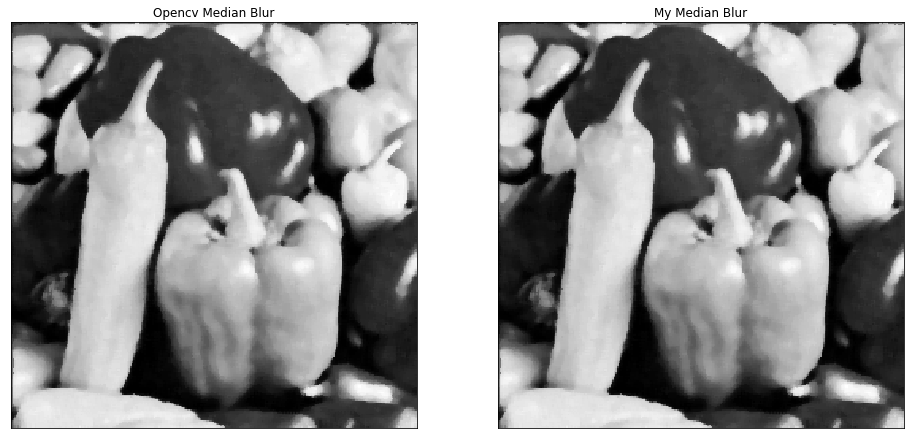

In [92]:
def myMedianBlur(img, size):
    """
    A implementation of median blur filter.
    """
    out = img.copy()
    H,W = img.shape[0],img.shape[1]
    s = (size - 1)/2
    #############################################################################
    # TODO: Implement the median blur.                                          #
    # NOTE: Your implementation is NOT necessary to provide the identical       #
    # output as OpenCV built-in function. However, it should be visually very   # 
    # similar.                                                                  #
    #############################################################################
    for row in range (H):
        for col in range (W):
            frame = getFrame(img, size, row, col)
            out[row][col] = findMedian(frame)
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return out
def getFrame(matrix, size, centralRow, centralCol):
    halfSize = int((size-1)/2)
    startRow = 0 if centralRow - halfSize < 0 else centralRow - halfSize
    endRow = matrix.shape[0] - 1 if centralRow + halfSize > matrix.shape[0] else centralRow + halfSize + 1
    startCol = 0 if centralCol - halfSize < 0 else centralCol - halfSize
    endCol = matrix.shape[1] - 1 if centralCol + halfSize > matrix.shape[1] else centralCol + halfSize + 1
    
    return matrix[startRow:endRow, startCol:endCol]


img = cv2.imread('imgs/SaltAndPepperNoise.jpg', 0)
mymedian = myMedianBlur(img,5)
median = cv2.medianBlur(img,5)

# Note that your implementation is NOT necessary to provide 
# the identical output as OpenCV built-in function. However,
# it should visually very similar.
plt.figure(figsize=(16,8))
plt.subplot(121),plt.imshow(median, 'gray')
plt.title('Opencv Median Blur'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(median, 'gray')
plt.title('My Median Blur'),plt.xticks([]),plt.yticks([])
plt.show()

# Image gradient
For 1-D continuous function $f(x)$, the gradient is given as:
$$D_x[f(x)]=\frac{d}{dx}f(x)=\lim\limits_{\Delta x\to 0}\frac{f(x+\Delta x)-f(x)}{\Delta x},\quad\text{or}\quad \lim\limits_{\Delta x\to 0}\frac{f(x+\Delta x)-f(x-\Delta x)}{2\Delta x}$$ 

For 1-D discrete function $f[n]$, the gradient becomes difference.
$$D_n[f[n]]=f[n+1]-f[n],\quad\text{ or }\quad\frac{f[n+1]-f[n-1]}{2}$$

The kernel to find gradient in 1-D discrete function is $[1, 0, -1]$. 

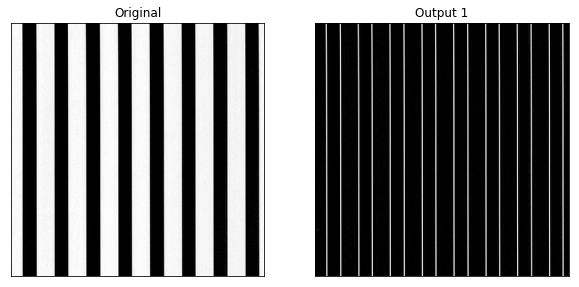

In [98]:
img = cv2.imread('imgs/banded_vertical.jpg', 0).astype(np.float32) 

#############################################################################
# TODO: Create a 3x3 kernel, Kx, to find the gradient in x-axis of an image.#
#############################################################################
Kx = np.zeros((3,3), np.float32)
for row in range (Kx.shape[0]):
    Kx[row][0] = 1.0
    Kx[row][1] = 0.0
    Kx[row][2] = -1.0
# print(Kx)
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################
dstx = cv2.filter2D(img,-1, Kx)

plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(np.abs(dstx), cmap='gray')
plt.title('Output 1'),plt.xticks([]),plt.yticks([])
plt.show()

[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]


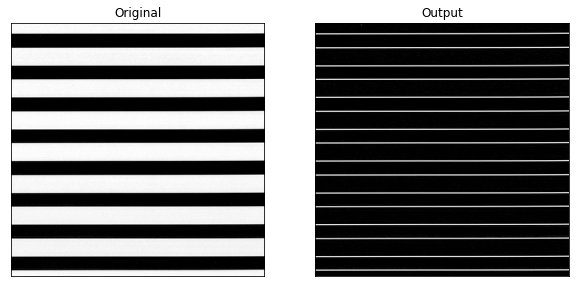

In [101]:
img = cv2.imread('imgs/banded_horizontal.jpg', 0).astype(np.float32)

#############################################################################
# TODO: Create a 3x3 kernel, Ky, to find the gradient in y-axis of an image.#
#############################################################################
Ky = np.zeros((3,3), np.float32)
for col in range (Ky.shape[1]):
    Ky[0][col] = -1.0
    Ky[1][col] = 0.0
    Ky[2][col] = 1.0
print(Ky)
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################
dsty = cv2.filter2D(img,-1,Ky)


plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img, 'gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(np.abs(dsty), 'gray')
plt.title('Output'),plt.xticks([]),plt.yticks([])
plt.show()

**Question:** What do the kernel `Kx` and `Ky` do in *image processing*?

**Answer:** Detecting vertical and horizontal edges

### Two directions:
* Find the difference: in the two directions: 
$$g_x[m,n]=f[m+1,n]-f[m-1,n]$$

$$g_y[m,n]=f[m,n+1]-f[m,n-1]$$

* Find the magnitude and direction of the gradient vector: 
$$\|g[m,n]\|=\sqrt{g^2_x[m,n]+g^2_y[m,n]}$$

$$\measuredangle g[m,n]=\tan^{-1}\left(\frac{g_y[m,n]}{g_x[m,n]}\right)$$

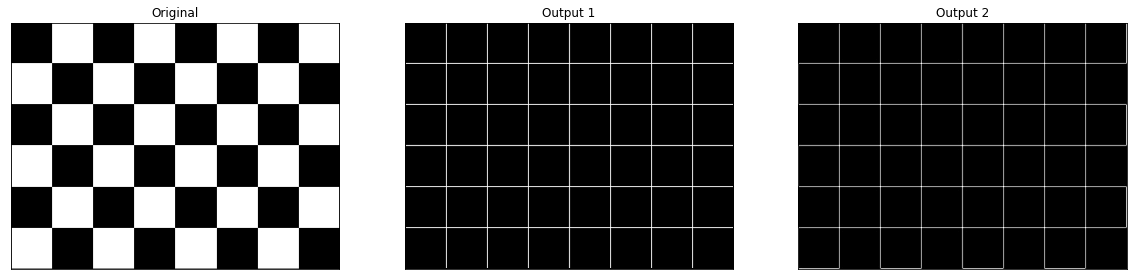

In [109]:
img = cv2.imread('imgs/chequered.jpg', 0).astype(np.float32)

#############################################################################
# TODO: Using the theory provided above, compute the magnitude of 2         # 
# direction image gradient.                                                 #
#############################################################################
H,W = img.shape
dst1 = np.zeros((H,W), np.float32)
for row in range (H):
    for col in range (W):
        frame = getFrame(img,3, row, col)
        if frame.shape == (3,3):
            dst1[row][col] = ((frame[2][1] - frame[0][1])**2 + (frame[1][2] - frame[1][0])**2)**.5
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

# You can achieve a similar (NOT identical) output with the following code line.
K = np.array([[0, 1,0],
              [1,-4,1],
              [0, 1,0]], dtype=np.float32)
dst2 = cv2.filter2D(img,-1,K)


plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, 'gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(np.abs(dst1), 'gray')
plt.title('Output 1'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(np.abs(dst2), 'gray')
plt.title('Output 2'),plt.xticks([]),plt.yticks([])
plt.show()

# Histogram 
 * It is a graphical representation of the intensity distribution of an image.
 * It quantifies the number of pixels for each intensity value considered.

## Histogram equilization
 * Equalization implies mapping one distribution (the given histogram) to another distribution (a wider and more uniform distribution of intensity values) so the intensity values are spreaded over the whole range.
 * To accomplish the equalization effect, the remapping should be the cumulative distribution function (cdf) (more details, refer to Learning OpenCV). For the histogram H(i), its cumulative distribution $H^{'}(i)$ is:

$$H^{'}(i) = \sum_{0 \le j < i} H(j)$$

 * To use this as a remapping function, we have to normalize $H^{'}(i)$ such that the maximum value is 255 ( or the maximum value for the intensity of the image ). From the example above, the cumulative function is:

![cumulative distribution function](imgs/Histogram_Equalization_Theory_2.jpg "Cumulative Distribution Function (cdf)")

* Finally, we use a simple remapping procedure to obtain the intensity values of the equalized image:

$$equalized( x, y ) = H^{'}( src(x,y) )$$


![Histogram Equalization](imgs/histEqualize.png "Histogram Equalization")

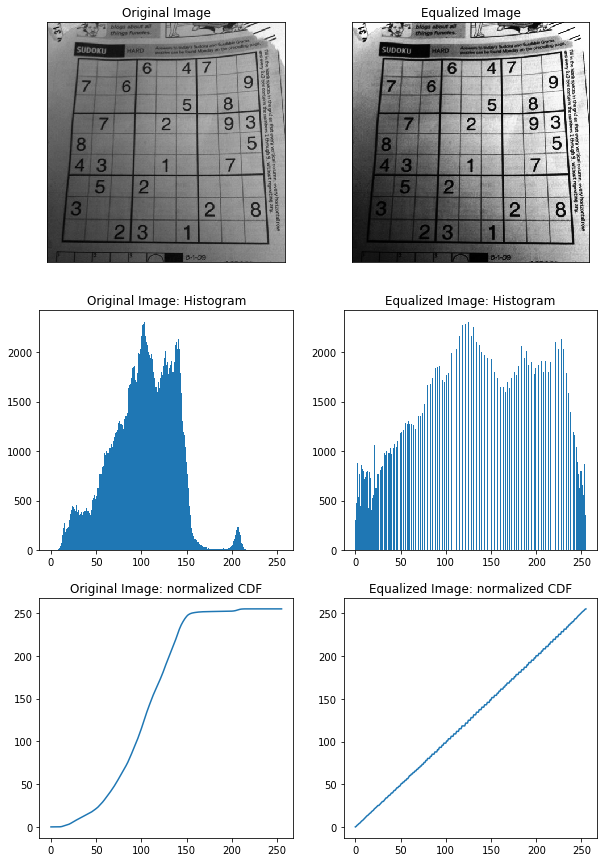

In [114]:
img = cv2.imread('imgs/sudoku-original.jpg',0)
W,H = img.shape
img_eq = cv2.equalizeHist(img)

hist = np.histogram(img, bins=256, range=(0.0, 255.0))
hist_eq = np.histogram(img_eq, bins=256, range=(0.0, 255.0))

plt.figure(figsize=(10,15))
plt.subplot(321),plt.imshow(img, cmap='gray'),plt.title('Original Image'),plt.xticks([]),plt.yticks([]) 
plt.subplot(322),plt.imshow(img_eq, cmap='gray'),plt.title('Equalized Image'),plt.xticks([]),plt.yticks([]) 
plt.subplot(323),plt.hist(img.ravel(), bins=256, range=(0.0, 255.0)),plt.title('Original Image: Histogram')
plt.subplot(324),plt.hist(img_eq.ravel(), bins=256, range=(0.0, 255.0)),plt.title('Equalized Image: Histogram')
plt.subplot(325),plt.plot(np.cumsum(hist[0])*255/(W*H)),plt.title('Original Image: normalized CDF')
plt.subplot(326),plt.plot(np.cumsum(hist_eq[0])*255/(W*H)),plt.title('Equalized Image: normalized CDF')
plt.show()

**QUIZ:** Is histogram equalization reversible?

**Your answer:** No histogram equalization is not reversible.

In [14]:
def myEqualizeHist(img):
    """
    A implementation of a histogram equalization for image of `uint8` data type.
    """
    NUMBER_OF_LEVELS = 256
    out = img
    #############################################################################
    # TODO: Implement the histogram equalization function.                      #
    #############################################################################
    uniquePixels,counts = np.unique(img, return_counts = True)
    imgPixelCount = img.shape[0] * img.shape[1]
    pdf = counts / float(imgPixelCount)
    cdf = 0.0
    pixelTranslation = {}
    for i in range (len(uniquePixels)):
        cdf = cdf + pdf[i]
        pixelTranslation[uniquePixels[i]] = int(cdf * (NUMBER_OF_LEVELS - 1))
#     print(newPixelValues)
    for row in range (img.shape[0]):
        for col in range (img.shape[1]):
            out[row][col] = pixelTranslation[img[row][col]]
                            
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return out

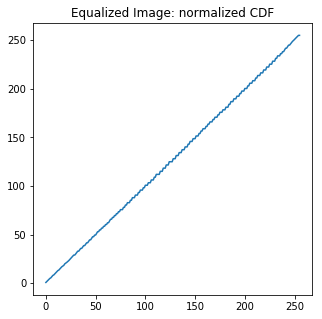

In [20]:
# Verify the correctness of your implementation by plotting the 
# normalized CDF of equalized image
img = cv2.imread('imgs/sudoku-original.jpg',0)
W,H = img.shape
img_myeq = myEqualizeHist(img)

# Your implementation may NOT need to return an image that is 
# exactly the same as the one OpenCV build-in function does. 
# However, the normalized CDF should make sense.
hist_myeq = np.histogram(img_myeq, bins=256, range=(0.0, 255.0))
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(hist_myeq[0])*255/(W*H))
plt.title('Equalized Image: normalized CDF')
plt.show()

# Threshold
## Simple Threshold
If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is [cv2.threshold](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#cv2.threshold). 

In [ ]:
# Get list of available flags for thresholding styles
flags = [i for i in dir(cv2) if i.startswith('THRESH_')]
print flags

## Adaptive Method

It decides how thresholding value is calculated. The function used is [cv2.adaptiveThreshold](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.adaptivethreshold#cv2.adaptiveThreshold).

 * cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
 * cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

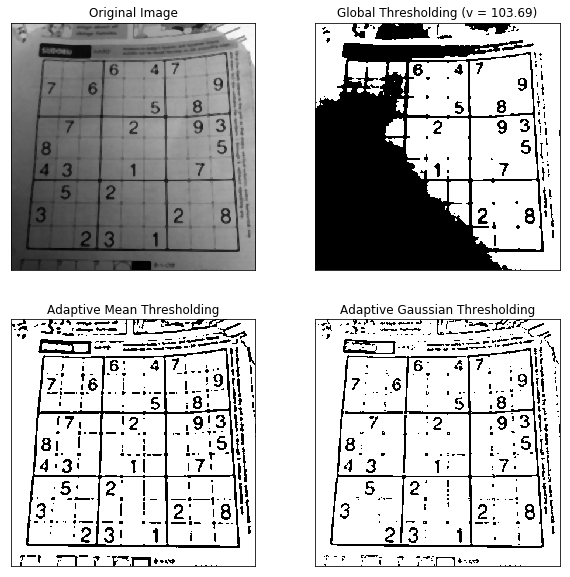

In [31]:
img = cv2.imread('imgs/sudoku-original.jpg',0)
img = cv2.medianBlur(img,5)
img_mean = np.mean(img)

C = 6
ret,th1 = cv2.threshold(img,img_mean,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,C)

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,C)

#############################################################################
# TODO - BONUS:                                                             #
# Trying several value of constant C and observing how the output           #
# thresholded images change. Then suggesting a method to automatically      #
# calculate this constant C.                                                #
#############################################################################

#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

titles = ['Original Image', 'Global Thresholding (v = {:.2f})'.format(img_mean),
        'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

fig = plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()